In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import datetime
import torch
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [93]:
url = 'https://raw.githubusercontent.com/Thomas101Shen/Dynamic_hedging/refs/heads/main/Option_SPX.csv'
data = pd.read_csv(url)
data = data

print(data.shape)
data.dropna(inplace=True)
print(data.shape)
print(data.head())

X = data[['Moneyness', 'TTM', 'D_BS', 'C_mkt', 'S']]
y = data[['Target']]

print(f'\n\nFeatures:\n {X.describe()} \n\n\n Test data:\n {y.describe()}')

(1008, 14)
(1008, 14)
         Date  ID  Days until next hedge        S  Dividend        C_BS  \
0  2024-10-09   1                      1  5792.04    1.3255  347.319191   
1  2024-08-12   3                      1  5344.39    1.4375   65.911689   
2  2024-08-05   5                      1  5186.33    1.4816   29.540325   
3  2024-11-15   1                      3  5870.62    1.3163  351.552064   
4  2024-09-17   6                      1  5634.58    1.3645   46.314393   

       D_BS   C_mkt  D_Blm        R  TTM  Moneyness  D_Optimal    Target  
0  0.630024  357.80  0.642  4.78852  163      92.04   0.385249 -0.244775  
1  0.227086   74.05  0.247  4.96403  221    -555.61   0.228776  0.001690  
2  0.111161   38.45  0.132  4.95853  228    -913.67  -0.159851 -0.271012  
3  0.685499  370.40  0.710  4.77039  126     170.62   0.377866 -0.307633  
4  0.185447   54.15  0.208  4.76338  185    -565.42   0.160314 -0.025133  


Features:
          Moneyness          TTM         D_BS        C_mkt       

         Moneyness          TTM         D_BS        C_mkt            S
count  1008.000000  1008.000000  1008.000000  1008.000000  1008.000000
mean   -235.458214   124.095238     0.376424   131.908829  5714.541786
std     262.068916    57.098591     0.203848   106.137719   198.707036
min   -1013.670000    18.000000     0.029593     5.050000  5186.330000
25%    -403.175000    78.750000     0.208732    38.350000  5596.780000
50%    -218.595000   124.500000     0.364226   109.125000  5725.530000
75%     -52.537500   169.250000     0.524479   197.137500  5851.895000
max     347.150000   228.000000     0.948629   483.900000  6047.150000

Skew: 
Moneyness   -0.234378
TTM          0.003353
D_BS         0.337676
C_mkt        0.903265
S           -0.537681
dtype: float64

Kurtosis: 
Moneyness   -0.237599
TTM         -0.964705
D_BS        -0.646047
C_mkt        0.163523
S           -0.033945
dtype: float64


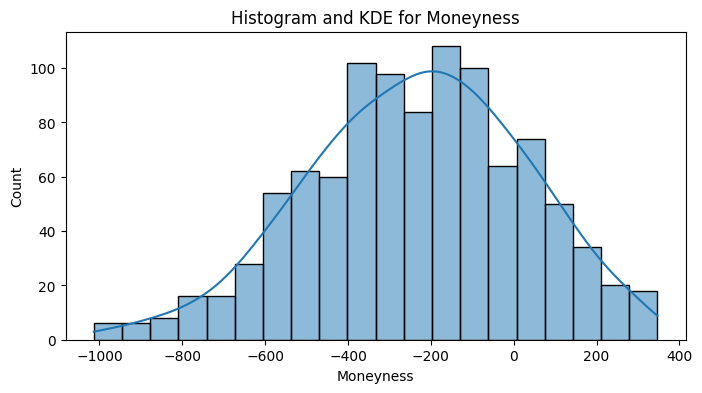

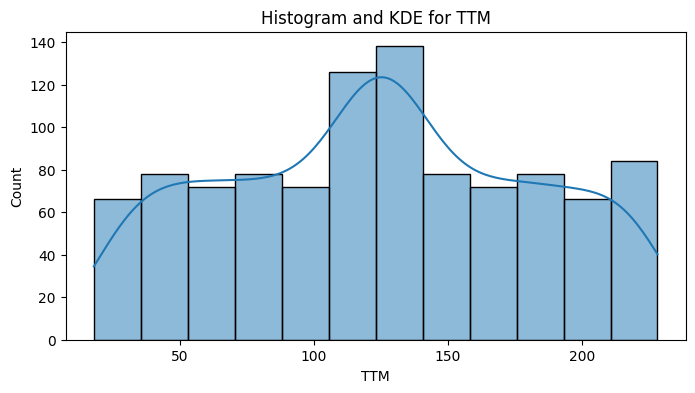

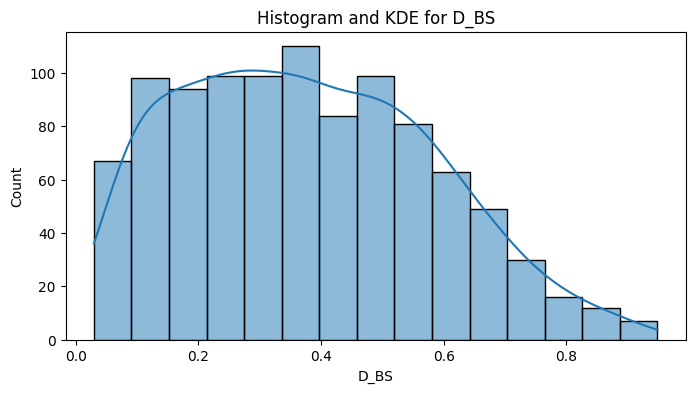

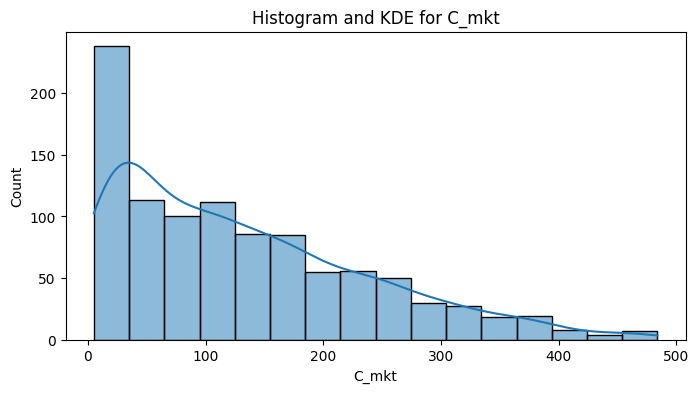

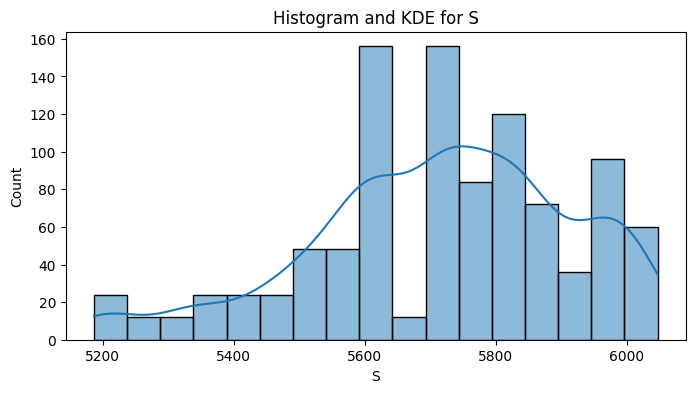

            Target
count  1008.000000
mean     -0.254678
std       3.233856
min     -40.533411
25%      -0.123975
50%      -0.033288
75%       0.067694
max       8.216118

Skew: 
Target   -8.577093
dtype: float64

Kurtosis: 
Target    84.230278
dtype: float64


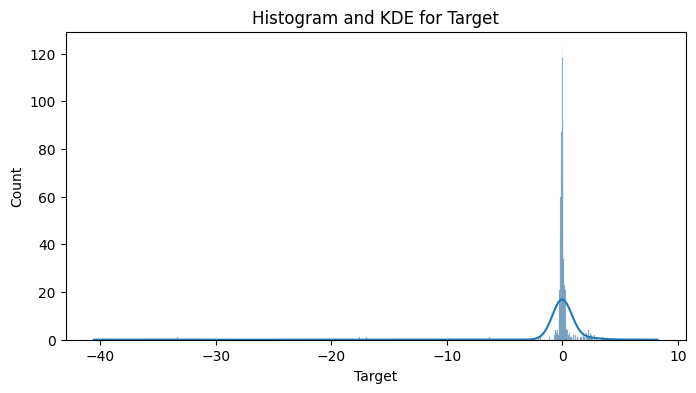

In [94]:
def describe_data(df):
    print(df.describe())
    print("\nSkew: ")
    print(df.skew())
    print("\nKurtosis: ")
    print(df.kurtosis())
    for column in df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[column], kde=True)
        plt.title(f'Histogram and KDE for {column}')
        plt.show()

describe_data(X)
describe_data(y)

In [95]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
# print(type(y_train_val))

In [96]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, shuffle=True)

In [97]:
def plot_train_test(train, test):
    columns = train.columns.tolist()
    # print(train.min(), test.min(), train.max(), test.max())
    for column in columns:
        plt.hist(train[column], bins=30, alpha=0.5
                 , label=f'Training data for {column}')
        plt.hist(test[column], bins=30, alpha=0.5, label=f'Test data for {column}')
        plt.legend()
        plt.title(f'Distribution of {column}')
        plt.show()

# print(X_train.min())


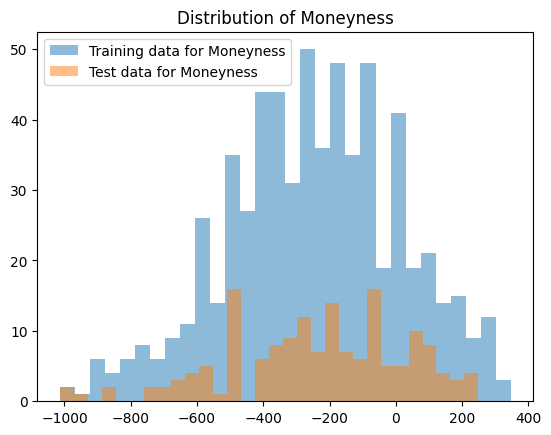

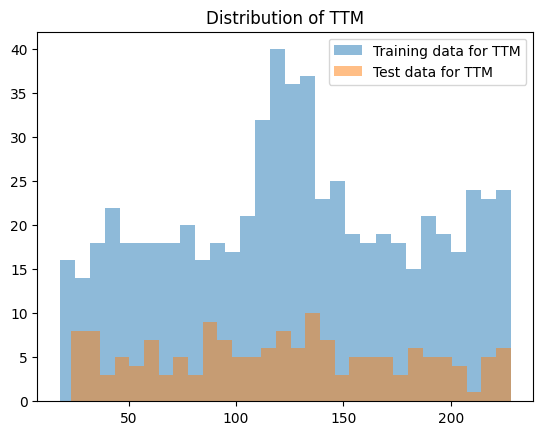

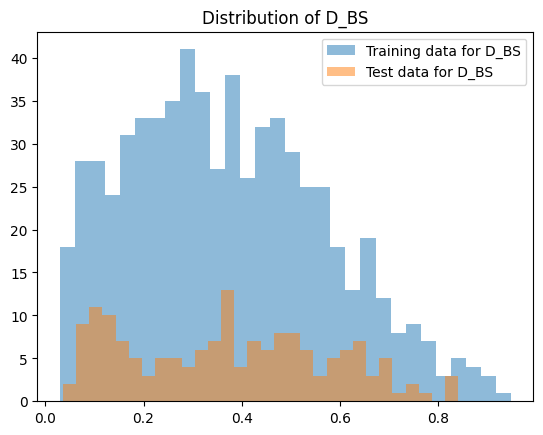

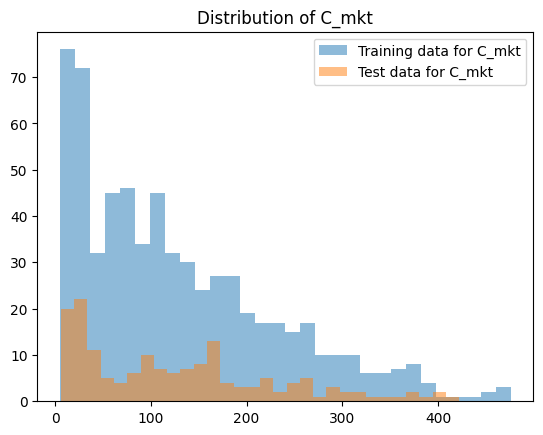

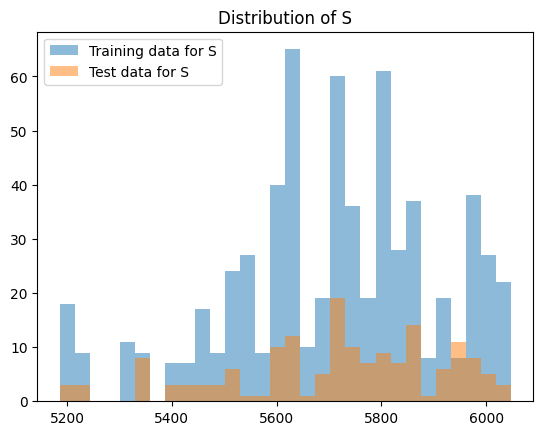

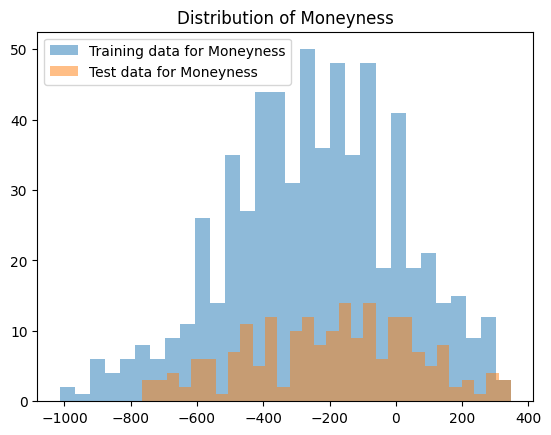

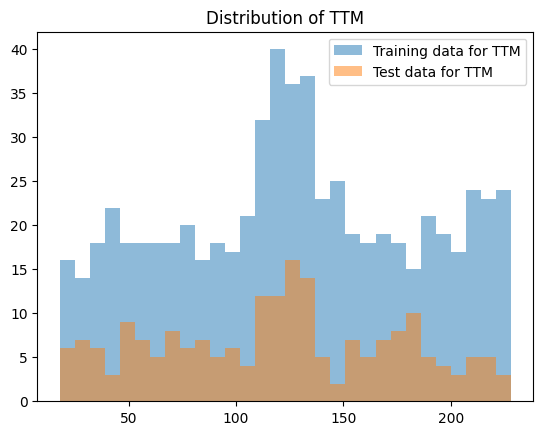

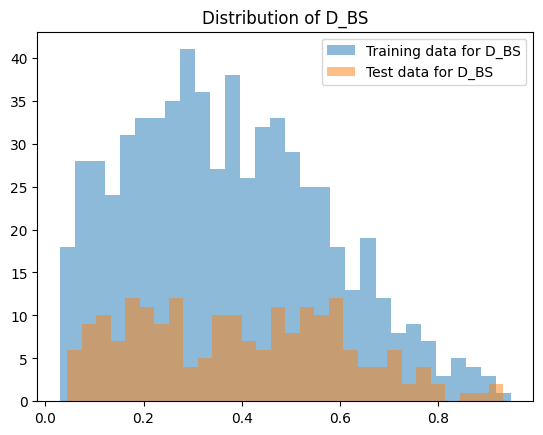

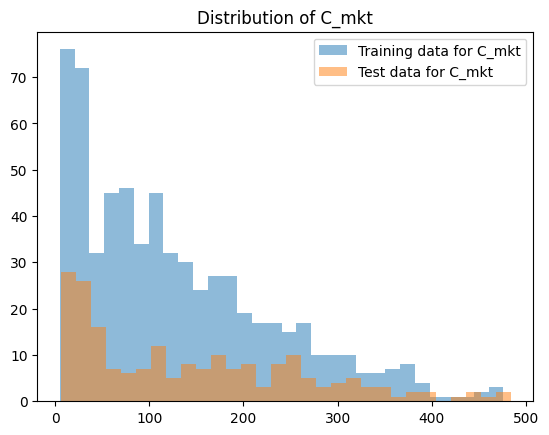

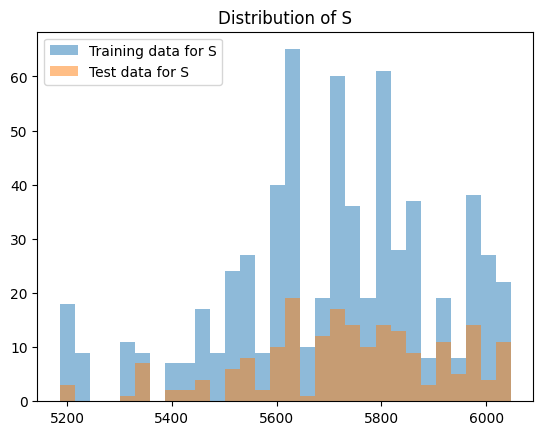

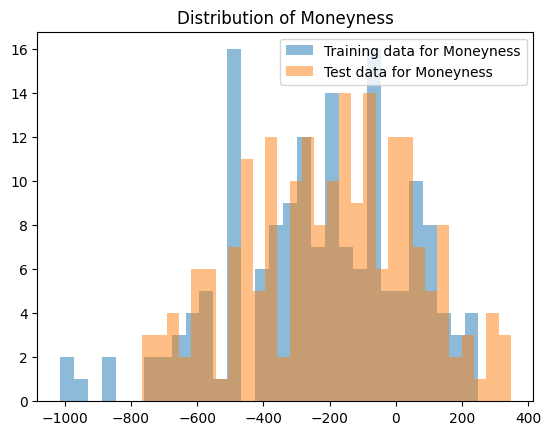

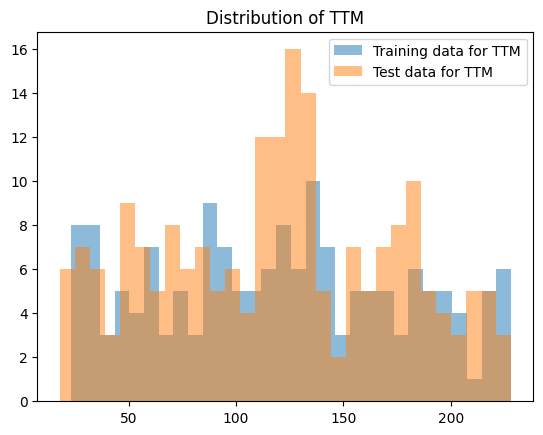

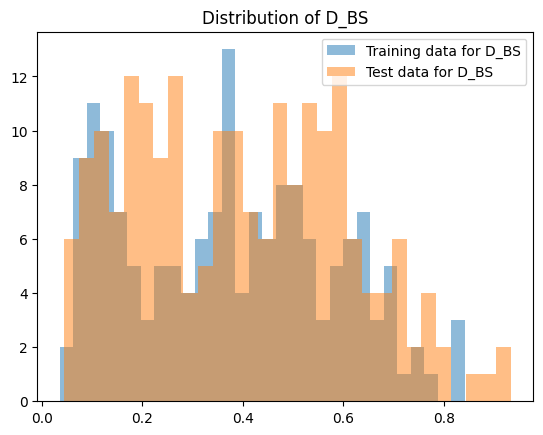

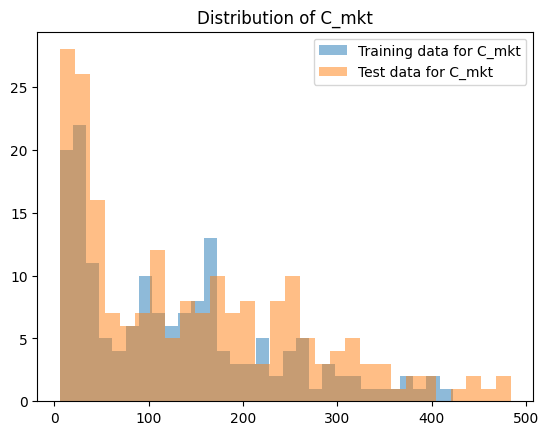

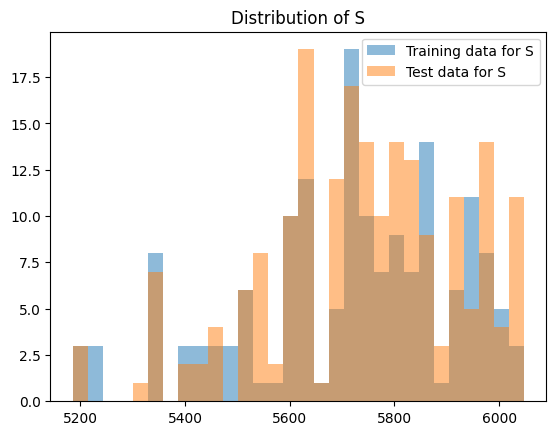

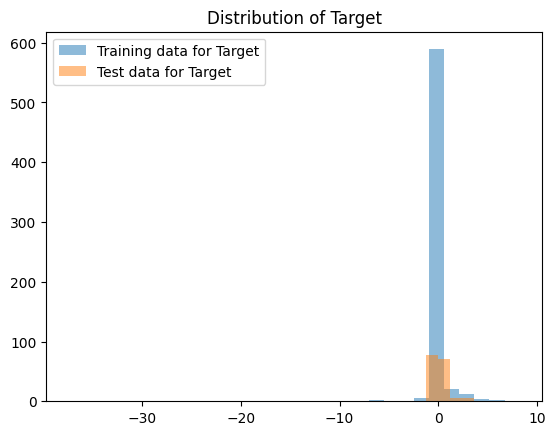

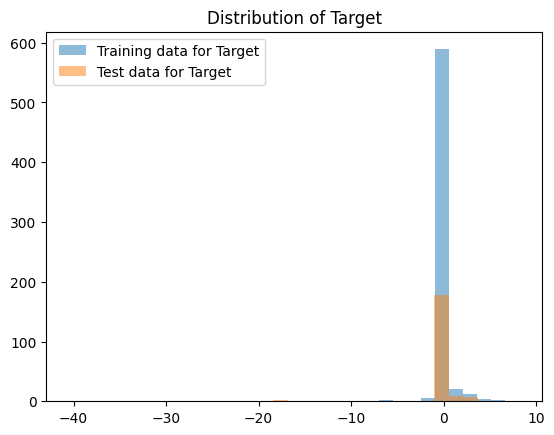

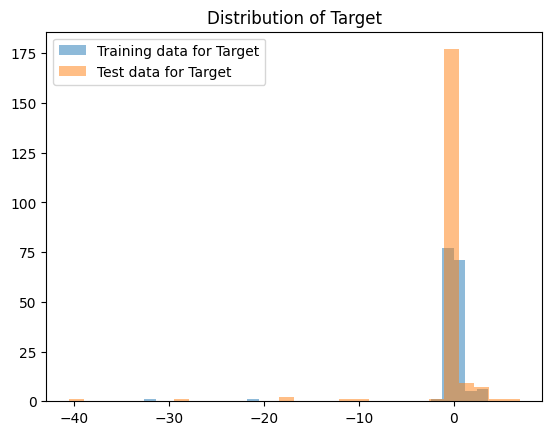

In [98]:
plot_train_test(X_train, X_val)
print("\n\n\n\n\n\n")
plot_train_test(X_train, X_test)
print("\n\n\n\n\n\n")
plot_train_test(X_val, X_test)
print("\n\n\n\n\n\n")

plot_train_test(y_train, y_val)
print("\n\n\n\n\n\n")
plot_train_test(y_train, y_test)
print("\n\n\n\n\n\n")
plot_train_test(y_val, y_test)  # Make note this is comparing the val to test

In [99]:
# print(type(X_train))
# X_train = pd.DataFrame(X_train, columns=feat_cols)
# X_test = pd.DataFrame(X_test, columns=feat_cols)
# X_val = pd.DataFrame(X_val, columns=feat_cols)

# X_train = torch.tensor(X_train_scaled.values, dtype=torch.float)
# X_test = torch.tensor(X_test_scaled.values, dtype=torch.float)
# X_val = torch.tensor(X_val_scaled.values, dtype=torch.float)

# X_train_scaled = scaler.transform(X_train)
# X_val_scaled = scaler.transform(X_val)
# X_test_scaled = scaler.transform(X_test)

import torch
from sklearn.preprocessing import MinMaxScaler

def scale_feat(scaler, *features):
    """
    Scales the input features using a provided scaler and converts them to PyTorch tensors.

    Parameters:
    - scaler: A fitted scaler instance (e.g., MinMaxScaler).
    - *features: Variable-length list of pandas DataFrames to scale and convert.

    Returns:
    - A tuple of pd dataframes or single pd dataframe corresponding to the scaled input features.
    """
    scaled_features = []
    for feature in features:
        # Ensure the feature is scaled
        feat_cols = feature.columns
        scaled_feature = scaler.transform(feature)
        scaled_feature = pd.DataFrame(scaled_feature, columns=feat_cols)
        scaled_features.append(scaled_feature)
    return tuple(scaled_features) if len(scaled_features) > 1 else scaled_features[0]

def convert_tensor(*inputs):
    """
    converts inputs to PyTorch tensors.

    Parameters:
    - *features: Variable-length list of pandas DataFrames to convert.

    Returns:
    - A tuple of PyTorch tensors or single tensor corresponding to the scaled input features.
    """
    tensors = []
    for inpt in inputs:
        tensor = torch.tensor(inpt.values, dtype=torch.float32)
        tensors.append(tensor)

    return tuple(tensors) if len(tensors) > 1 else tensors[0] # Convert list to tuple before returning

loss_cols = ['C_mkt', 'D_BS', 'S']
feat_cols = ['Moneyness', 'TTM', 'D_BS']

# print(X_train.columns)

loss_train, loss_val, loss_test = X_train[loss_cols], X_val[loss_cols], X_test[loss_cols]

scaler = MinMaxScaler()
scaler.fit(X_train[feat_cols])

X_train, X_val, X_test = scale_feat(scaler, X_train[feat_cols], X_val[feat_cols], X_test[feat_cols])





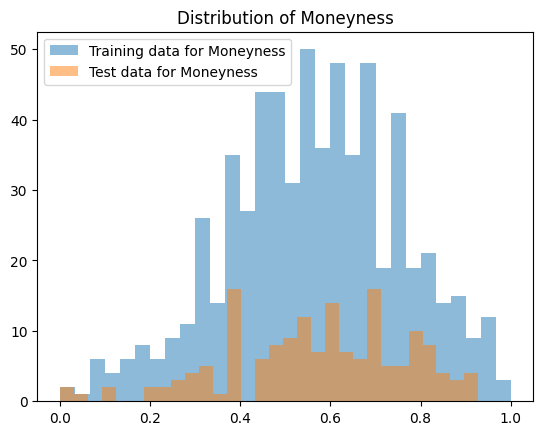

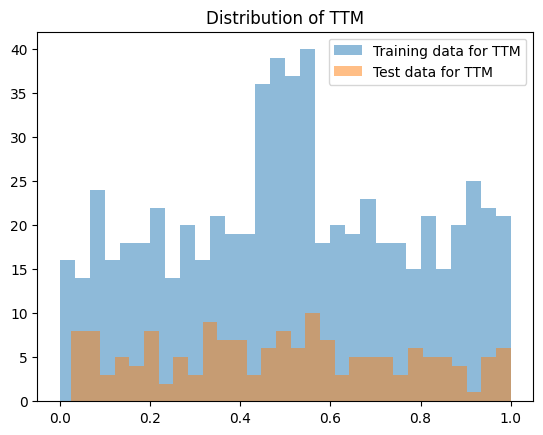

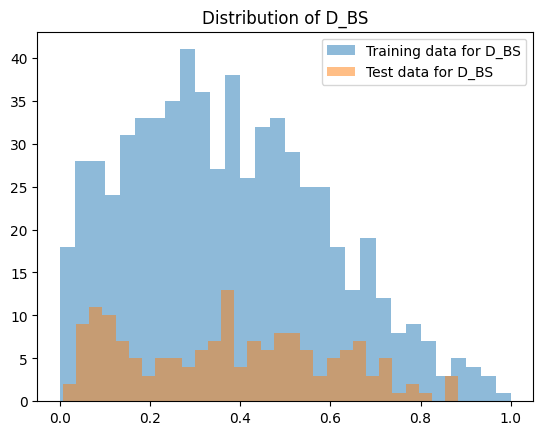

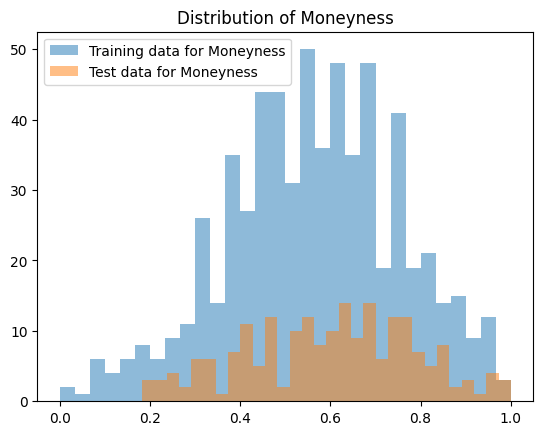

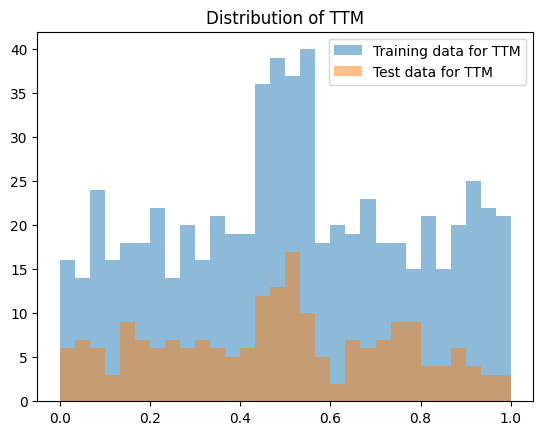

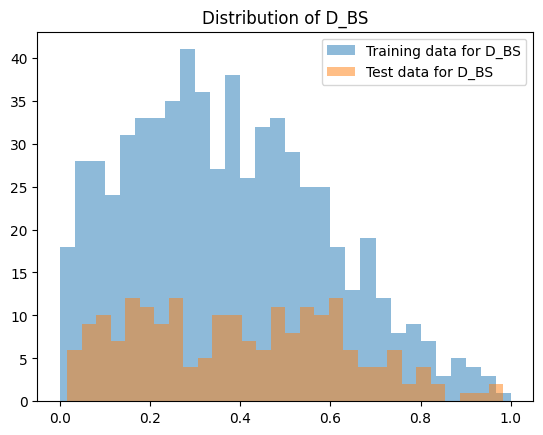

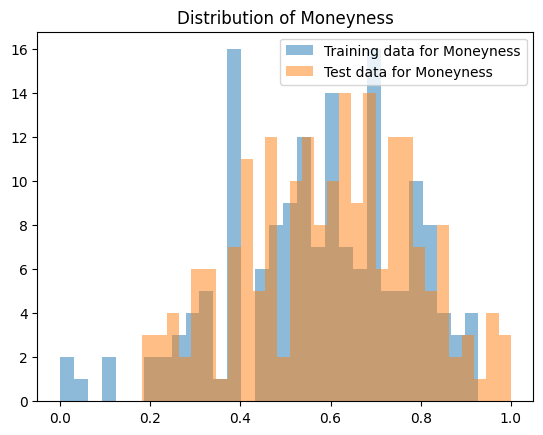

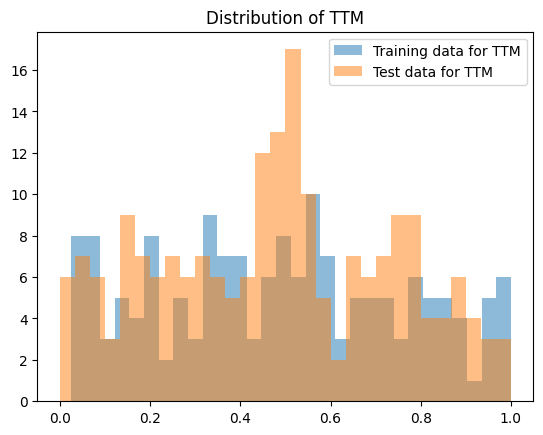

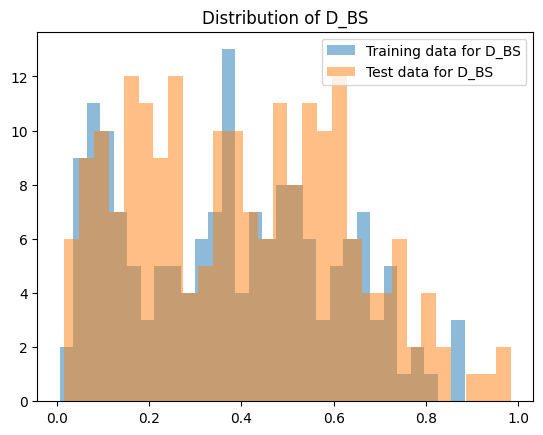

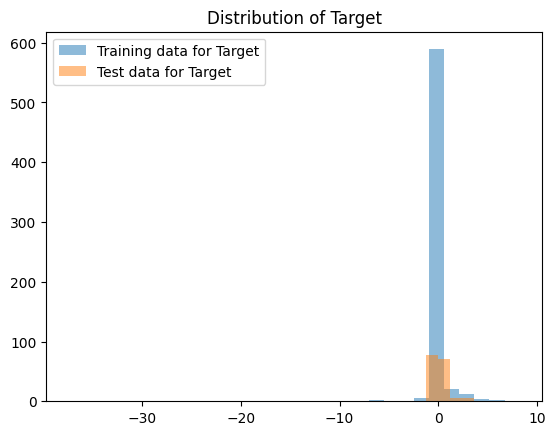

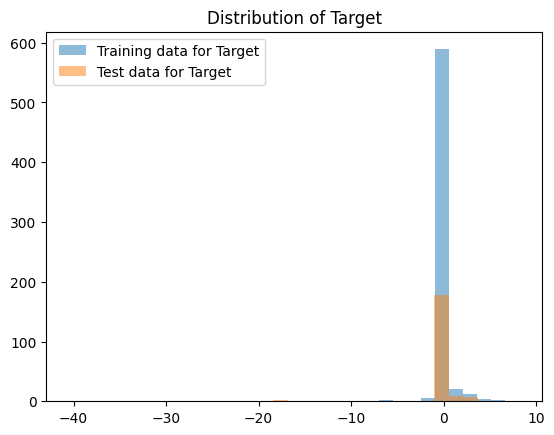

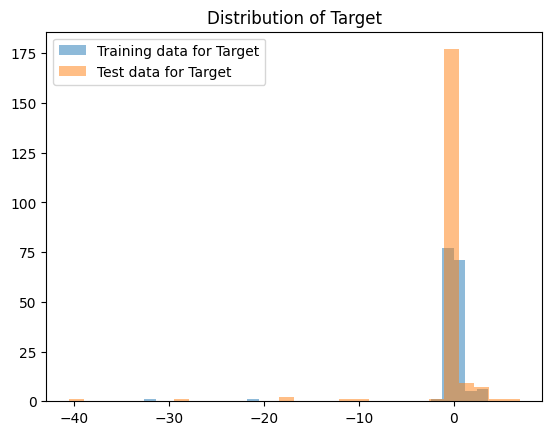

In [100]:
plot_train_test(X_train, X_val)
print("\n\n\n\n\n\n")
plot_train_test(X_train, X_test)
print("\n\n\n\n\n\n")
plot_train_test(X_val, X_test)
print("\n\n\n\n\n\n")

plot_train_test(y_train, y_val)
print("\n\n\n\n\n\n")
plot_train_test(y_train, y_test)
print("\n\n\n\n\n\n")
plot_train_test(y_val, y_test)  # Make note this is comparing the val to test

In [101]:
X_train, X_val, X_test = convert_tensor(X_train, X_val, X_test)
# X_train.shape

In [102]:
import torch.nn as nn
import torch.optim as optim


class FNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FNN, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.activation = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.hidden(x)
        x = self.activation(x)
        x = self.output(x)
        return x


input_size = 3
hidden_size = 6
output_size = 1

In [103]:
y_train, y_test, y_val = convert_tensor(y_train, y_test, y_val)
# print(y_train.shape)

In [108]:
def train_model(model, epochs, loss_func, optimizer, c_diff_t, s_diff_t, d_bs_t, c_diff_v, s_diff_v, d_bs_v):
    patience = 20
    best_val_loss = float('inf')
    for epoch in range(epochs):
        model.train()
        predictions_train = model(X_train)
        loss_train = loss_func(predictions_train, c_diff_t, s_diff_t, d_bs_t)
    
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
    
        model.eval()
        with torch.no_grad():
            predictions_val = model(X_val)
            loss_val = loss_func(predictions_val, c_diff_v, s_diff_v, d_bs_v)
    
        # Check for improvement
        if loss_val < best_val_loss:
            best_val_loss = loss_val
            wait = 0
        else:
            wait += 1
            if wait >= patience:
                print("Early stoppage")
                print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {loss_train.item():.4f}, Validation Loss: {loss_val.item():.4f}")
                break
                
        if (epoch + 1) % 5 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {loss_train.item():.4f}, Validation Loss: {loss_val.item():.4f}")

In [109]:
def print_tensor_with_precision(tensor, decimals=8):
    """Print a PyTorch tensor or float with specified decimal precision."""
    if isinstance(tensor, float) or tensor.dim() == 0:  # Handle scalar tensors and floats
        print(f"{tensor:.{decimals}f}")
    elif tensor.dim() == 1:  # Handle 1D tensors
        formatted_row = [f"{val:.{decimals}f}, " for val in tensor.tolist()]
        print(" ".join(formatted_row))
    else:  # Handle multi-dimensional tensors
        for row in tensor:  
            formatted_row = [f"{val:.{decimals}f}, " for val in row.tolist()]
            print(" ".join(formatted_row))

class CustomLoss(nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()
    
    def forward(self, predictions, s_diff, c_diff, d_bs):
        """
        Args:
            predictions (torch.Tensor): Output of the neural network.
            s_diff (pd.DataFrame): Stock change in price
            c_diff (pd.DataFrame): Option change in price
            d_bs (pd.DataFrame): Black-Scholes Delta
            
        Returns:
            torch.Tensor: MSE of residual plus predicted delta times stock diff and option diff
        """
        
        # quotient = o_price / s_price
        # print(f"quotient: \n {print_tensor_with_precision(quotient)}")
        # quotient = torch.tensor(quotient, dtype=torch.float32)
        # print(f"quotient: \n {print_tensor_with_precision(quotient)}, \n d_bs: \n {print_tensor_with_precision(d_bs)}")
        # print(f"predictions: \n {print_tensor_with_precision(predictions)}, \n")
        
        difference = o_diff - (predictions + d_bs) * s_change
        
        loss = torch.mean(difference ** 2)
        return loss


In [106]:
def prep_loss_metrics(loss_metrics):
        c_diff = loss_metrics['C_mkt'].diff().dropna()
        s_diff = loss_metrics['S'].diff().dropna()
        d_bs = loss_metrics['D_BS'].iloc[1:]
        
        c_diff, s_diff, d_bs = convert_tensor(c_diff, s_diff, d_bs)
    
        return c_diff, s_diff, d_bs


In [86]:
c_diff_t, s_diff_t, d_bs_t = prep_loss_metrics(loss_train)
c_diff_v, s_diff_v, d_bs_v = prep_loss_metrics(loss_val)
c_diff_test, s_diff_test, d_bs_test = prep_loss_metrics(loss_test)

model = FNN(input_size, hidden_size, output_size)
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_func = CustomLoss()
train_model(model, 1000, loss_func, optimizer, c_diff_t, s_diff_t, d_bs_t, c_diff_v, s_diff_v, d_bs_v)

TypeError: train_model() takes 4 positional arguments but 10 were given

In [110]:
def train_batch_model(model, epochs, batch_size, loss_func, optimizer):
    patience = 20
    wait = 0
    best_val_loss = float('inf')
    for epoch in range(epochs):
        for start in range(0, len(X_train), batch_size):
            end = start + batch_size
            X_batch = X_train[start:end]
            y_batch = y_train[start:end]
        
            # Forward pass
            predictions_train = model(X_batch)
            loss_train = loss_func(predictions_train, y_batch)
        
            # Backward pass
            optimizer.zero_grad()
            loss_train.backward()
            optimizer.step()
    
        model.eval()
        with torch.no_grad():
            predictions_val = model(X_val)
            loss_val = loss_func(predictions_val, y_val)
    
        # Check for improvement
        if loss_val < best_val_loss:
            best_val_loss = loss_val
            wait = 0
        else:
            wait += 1
            if wait >= patience:
                print("Early stoppage")
                print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {loss_train.item():.4f}, Validation Loss: {loss_val.item():.4f}")
                break
                
        if (epoch + 1) % 5 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {loss_train.item():.4f}, Validation Loss: {loss_val.item():.4f}")

In [111]:
batch_model = FNN(input_size, hidden_size, output_size)
optimizer_batch = optim.Adam(batch_model.parameters(), lr=0.01)

In [112]:
train_batch_model(batch_model, 1000, 30, loss_func, optimizer_batch)

Epoch [5/1000], Training Loss: 0.0286, Validation Loss: 9.6070
Epoch [10/1000], Training Loss: 0.0251, Validation Loss: 9.5998
Epoch [15/1000], Training Loss: 0.0231, Validation Loss: 9.5932
Epoch [20/1000], Training Loss: 0.0217, Validation Loss: 9.5877
Epoch [25/1000], Training Loss: 0.0209, Validation Loss: 9.5835
Epoch [30/1000], Training Loss: 0.0207, Validation Loss: 9.5805
Epoch [35/1000], Training Loss: 0.0212, Validation Loss: 9.5788
Epoch [40/1000], Training Loss: 0.0222, Validation Loss: 9.5782
Epoch [45/1000], Training Loss: 0.0236, Validation Loss: 9.5784
Epoch [50/1000], Training Loss: 0.0251, Validation Loss: 9.5789
Epoch [55/1000], Training Loss: 0.0269, Validation Loss: 9.5802
Epoch [60/1000], Training Loss: 0.0286, Validation Loss: 9.5815
Early stoppage
Epoch [61/1000], Training Loss: 0.0289, Validation Loss: 9.5818


In [113]:
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    test_loss = loss_func(predictions, y_test)
    print(f"No batch MSE: {test_loss.item():.4f}")
    
batch_model.eval()
with torch.no_grad():
    predictions = batch_model(X_test)
    test_loss = loss_func(predictions, y_test)
    print(f"30 batch MSE: {test_loss.item():.4f}")

No batch MSE: 16.7299
30 batch MSE: 16.7199


In [114]:
mse_greeks = (data['Target']**2).mean()
print(f"Standard greek MSE: {mse_greeks}")

Standard greek MSE: 10.51231005280044
